# Проект по курсу «Наука о данных» — Препарирование игры в дурака
Дмитрий Махаев

## Описание проекта
Меня всегда интересовала известная карточная игра в дурака. Давно мучавшей меня идеей было убеждение о том, что стратегия, по которой я и большинство моих знакомых, с кем я разговаривал на эту тему, играют в дурака, является не лучше, чем играть случайно. Обычно, играя с друзьями и не слишком задумываясь о том, как бы победить, я всегда кладу самую слабую карту на стол за некоторыми исключениями. Этот проект изначально был создан для проверки гипотезы о том, что играть так — все равно что всегда играть случайную карту из руки, которая подходит по правилам. Этот проект является адаптацией личного проекта, поэтому не претендует на выполнение большого количества требований, хотя, на мой взгляд, весьма интересен.

Для исследований была написана, собственно, игра в дурака для 2-6 игроков с классическими правилами, в которую могут играть как боты, так и человек. Я постарался создать максимально удобное окружение для написания новых ботов, играющих потенциально любые стратегии, так как в дальнейшем я планирую продолжить исследование. Игра и большинство ботов находятся в файле fool.py — внутри него есть описание некоторых элементов.

## План
- Проверить вышеописанную гипотезу
- Попытаться улучшить наивную стратегию «всегда класть самую маленькую карту»
- Натренировать нейросеть, играющую в дурака, попытаться с помощью неё победить наивную стратегию. Интересно проверить, можно ли побить такую стратегию, имея минимальные данные, не запоминать карты, но иметь какую-никакую думалку. 

### Устройство кода игры
- Основное окружение выполнено в качестве класса Game
- Вспомогательно было создан класс колоды Deck, класс «ведущего», определяющего, кто сейчас ходит Chain, и несколько вспомогательных функций.
- Классы реализации всех ботов и возможности играть человеку наследуют от класса Player и могут получать информацию о происходящем почти в любой момент игры.



In [2]:
import fool as f
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

## Демонстрация работы игры

Запустив ячейку ниже, можно сыграть игру 1 на 1 с ботом, играющим самый левый подходящий ход в руке. Таким ботом я симулирую стратегию «играть случайный ход». Ход выбирается на самом деле не случайно, поскольку люди не умеют хорошо выбирать случайные числа. Код не написан с целью играть в игру, поэтому UI, наверное, не самый удобный, но играть можно.

trumpcard — козырная карта
Ходы нумеруются с единицы, pass и take тоже

In [ ]:
bot = f.RS_Left('bot')
player = f.RealPlayer(f"{input('Введите своё имя ^-^')}")
game = f.Game((bot, player))
game.play()

Введите своё имя ^-^ dima


----------------------------------------------------------------------------------------------------
trumpcard is 10♦
dima, you hand: ['7♣', '9♦', 'K♠', 'J♠', '8♥', '7♠'], the board: {'toBeat': '10♠'}
You defend, you can play either of these moves ['9♦', 'K♠', 'J♠'] and TAKE


Please, pick a number of a move 3


----------------------------------------------------------------------------------------------------
dima, you hand: ['7♣', '9♦', 'K♠', '8♥', '7♠'], the board: {'10♠': 'J♠', 'toBeat': '10♥'}
You defend, you can play either of these moves ['9♦'] and TAKE


Please, pick a number of a move 1


----------------------------------------------------------------------------------------------------
dima, you hand: ['7♣', 'K♠', '8♥', '7♠'], the board: {'10♠': 'J♠', '10♥': '9♦', 'toBeat': 'J♣'}
You defend, you can play either of these moves [] and TAKE


Please, pick a number of a move 1


----------------------------------------------------------------------------------------------------
dima, you hand: ['7♣', 'K♠', '8♥', '7♠', '10♠', 'J♠', '10♥', '9♦', 'J♣'], the board: {'toBeat': 'Q♣'}
You defend, you can play either of these moves ['9♦'] and TAKE


Please, pick a number of a move 1


----------------------------------------------------------------------------------------------------
dima, your hand: ['7♣', 'K♠', '8♥', '7♠', '10♠', 'J♠', '10♥', 'J♣'], the board: {}
You attack, you can play either of these moves: ['7♣', 'K♠', '8♥', '7♠', '10♠', 'J♠', '10♥', 'J♣']


Please, pick a number of a move 1


----------------------------------------------------------------------------------------------------
dima, your hand: ['K♠', '8♥', '7♠', '10♠', 'J♠', '10♥', 'J♣'], the board: {'7♣': 'K♦'}
You attack, you can play either of these moves: ['K♠', '7♠'] and PASS


Please, pick a number of a move 2


----------------------------------------------------------------------------------------------------
dima, your hand: ['K♠', '8♥', '10♠', 'J♠', '10♥', 'J♣'], the board: {'7♣': 'K♦', '7♠': 'A♠'}
You attack, you can play either of these moves: ['K♠'] and PASS


Please, pick a number of a move 1


----------------------------------------------------------------------------------------------------
dima, your hand: ['8♥', '10♠', 'J♠', '10♥', 'J♣'], the board: {'7♣': 'K♦', '7♠': 'A♠', 'toBeat': 'K♠'}
You attack, you can play either of these moves: [] and PASS


Please, pick a number of a move 1


----------------------------------------------------------------------------------------------------
dima, your hand: ['8♥', '10♠', 'J♠', '10♥', 'J♣', '8♣'], the board: {}
You attack, you can play either of these moves: ['8♥', '10♠', 'J♠', '10♥', 'J♣', '8♣']


KeyboardInterrupt: Interrupted by user

## Проверка гипотезы
В этом разделе столкнём друг с другом ботов Naive1 и RS_Left 20000 раз (за одну секунду на моем компьютере играется более тысячи игр, так что количество можно увеличивать для более высокой точности, но тут это не надо). Naive1 всегда играет самую слабую карту из подходящих, не пасует и не берёт, пока может отбиваться. С RS_Left мы уже знакомы.

Сила карты считается очень простым способом. Не козырным картам по возрастанию от 6 до туза ставится в соответствие счёт от 0 до 8. Козырным картам от 6 до туза ставится в соответствие счёт от 9 до 13.

Будем сохрянять длительности игр на будущее.

In [ ]:
naive = f.Naive1('naive')
random = f.RS_Left('random')
players = (naive, random)
count = 20000

fool_history = []
lengths_history = []
for i in tqdm(range(count)):
    
    #играем игру
    game = f.Game(players)
    game.play()
    
    #проверяем, кто проиграл
    fool = game.results['fool']
    if naive in fool: fool_history.append('naive')
    elif random in fool: fool_history.append('random')
    else: fool_history.append('draw')
    
    #сохряняем длительность
    lengths_history.append(game.results['length'])
    
    #избавляемся от вещей, хранящихся у игроков от прошлой игры. похоже на optimizer.zero_grad() :))))))
    for p in players: p.dump()
    
n_vs_r = pd.DataFrame(data = (lengths_history, fool_history), index = ['lengths', 'fool']).T

100%|███████████████████████████████████| 20000/20000 [00:17<00:00, 1164.84it/s]


In [ ]:
fool_counts = n_vs_r['fool'].value_counts()
print(f"Naive lost {fool_counts['naive']*100/count}% of games",
      f"Random lost {fool_counts['random']*100/count}% of games",
      f"Draw was {fool_counts['draw']*100/count}% of games", sep='\n')

Naive lost 28.51% of games
Random lost 68.35% of games
Draw was 3.14% of games


Выходит, что я был не прав, и выбирать самую слабую карту в среднем лучше, чем играть наобум. Но всё равно, если играть наобум, можно не проигрывать практически треть игр. Мне кажется, это поразительный результат.

## Улучшение стратегии
Тестируя разные идеи, я заметил, что придерживать козырные карты, не играя их в первые несколько ходов, даёт неплохое преимущество. При этом почти не важно, придерживать ли все козыри или начиная с какого-то номинала. Думаю, это потому что козырные карты по ценности делают очень высокий скачок по сравнению с обычными картами, поэтому моделирование силы вышеописанным образом не очень разумно, но для моих целей удовлетворительно.

В боте Naive2 добавлена способность не играть козыри до заранее заданного номера хода. Не очень интересно смотреть, как такой бот будет играть только против одного соперника, поэтому можно представить себе игру, в котрой будет два игрока, а стратегией будет как раз число ходов, до которого игрок не играет козыри. Выигрышем будет доля поражений соперника за большое число игр.

Naive2 принимает значение cutoff, определяющее ход, начиная с которого бот начинает использовать козыри. Конечно, если в руке нет карт кроме козырей, то придётся играть козыря во время атаки.
Для начала определим, какие значения cutoff в принципе стоит проверять, то есть насколько длинные вообще бывают игры. Именно для этого в предыдущем разделе мы сохраняли длины. Да, там играли другие игроки, но количество длиных игр пренебрежимо мало, поэтому отсечём до какого-то адекватного значения.

In [ ]:
print('Вот столько длилась самая длинная игра: ', n_vs_r.lengths.max())

Вот столько длилась самая длинная игра:  29


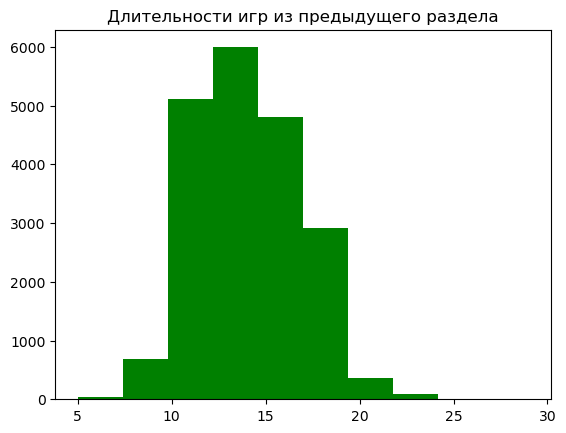

In [ ]:
plt.hist(n_vs_r['lengths'], color='green')
plt.title('Длительности игр из предыдущего раздела');

Норм гистограмма.

Возьмём 20 за максимальное значение cutoff. Если больше, мне придётся ждать вечность, плюс к тому по любому здравому смыслу это будет примерно то же самое, что не играть козыри вообще.

Прогоним по 5 тысяч игр каждой комбинацией стратегий. Но у многих есть симметричные, поэтому надо рассматривать не все. Это даст нам $231$ комбинаций, что должно занять примерно 17.5 минут на моем компьютере. 

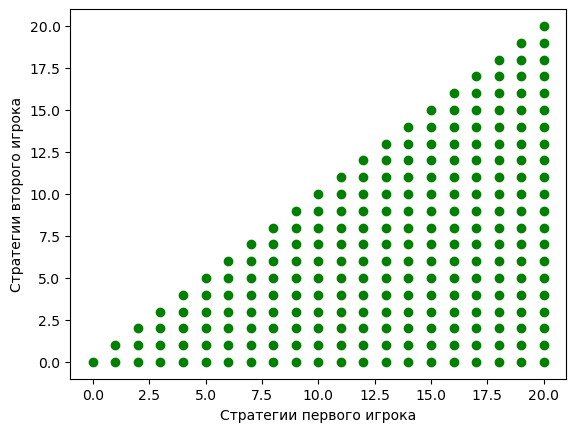

In [ ]:
#сгенерируем все пары стратегий:
strats = [(a, b) for a in range(21) for b in range(21) if b<=a]
plt.scatter([p[0] for p in strats], [p[1] for p in strats], color='green')
plt.xlabel('Стратегии первого игрока')
plt.ylabel('Стратегии второго игрока');

In [ ]:
#warning: ДОЛГО!
results = {}
for pair in tqdm(strats):
    p1 = f.Naive2('p1', cutoff=pair[0])
    p2 = f.Naive2('p2', cutoff=pair[1])
    players = (p1, p2)
    fool_history = []
    for i in range(5000):
        game = f.Game(players)
        game.play()
        
        fool = game.results['fool']
        if p1 in fool: fool_history.append('p1')
        elif p2 in fool: fool_history.append('p2')
        else: fool_history.append('draw')
        
        for p in players: p.dump()     
    p1_win_rate = sum([r == 'p2' for r in fool_history])
    results[pair] = p1_win_rate

100%|█████████████████████████████████████████| 231/231 [22:54<00:00,  5.95s/it]


In [ ]:
for pair in strats:
    results[pair] = results[pair]/5000
    if pair[0] != pair[1]:
        results[(pair[1], pair[0])] = 1-results[pair]

Теперь нарисуем heatmap, чтобы взглянуть на результаты. 

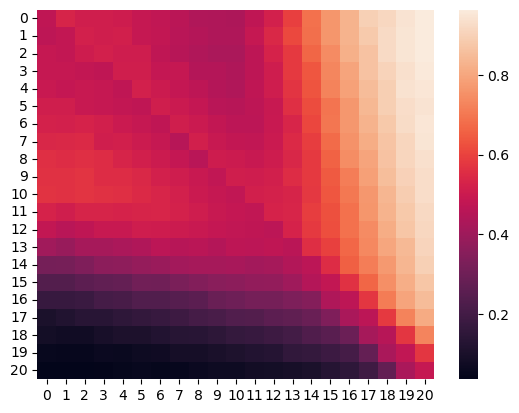

In [ ]:
import numpy as np
results_numpy = np.zeros((21, 21))
for pair in results:
    results_numpy[pair[0], pair[1]] = results[pair]

import seaborn as sns

sns.heatmap(results_numpy);

Первый игрок, на выгрыш которого мы смотрим расположен по вертикали. Видно, что оптималньее всего держать козыри до примерно 8-10 хода, если мы думаем, что наш противник держит козыри до хода не больше нашего. С учётом того что обычные люди редко держат козыри слишком долго (а ещё в этом есть непостояноство), начинать разыгрывать своих козырей около 7-8 хода кажется оптимальным. Понятно, что наш бот довольно глупый, поэтому скорее всего в реальной жизни надо действовать по-другому, но из этого эксперимента мы не сможем узнать это.

## Нейросеть
От нейросети мы вряд ли что-то узнаем о том, как играть (если только не строить однослойный классификатор, где веса можно легко проинтерпретировать). Поэтому это будет скорее для интереса, можно ли чего-то добиться таким образом, которым я собираюсь. 

Выбор карты в на каждом ходу это, по сути, задача классификации. Но тренировать обычным образом классификатор не выйдет, посколько никто не знает, как правильно ходить. Использовать нормальный RL подход я не могу за ограниченное время до дедлайна, но могу попытаться сделать вот что:
- Запустить рандомную (по-настоящему рандомную, то есть без прикола играть самую левую карту) стратегию и нагенерировать кучу ходов. В настоящих играх с какой-нибудь стратегией (выберем, скажем, стратегию 7 из предыдущего раздела)
- Отсечь только ходы, которые приблизили игрока к победе
- Натренировать простую feed-through нейросеть, используя в качестве фичей состояние игры на момент хода, а в качестве метки выбранную рандомной стратегией карту

Я сначала думал использовать RNN, но для этого очень сложно будет выбрать правильные данные, так что пока остановлюсь на том, что есть.

Осталось определить, какие ходы приближают игрока к победе. Настоящего ответа никто не знает, поэтому будем считать так:
- Во-первых к победе явным образом приблежают ходы, после которых у нас стало меньше карт. Но это относится к концу игры
- Во-вторых к победе приближают ходы, после которых средняя сила карт в руке растёт

Понятно, что не все такие ходы хорошие, но делать что-то более сложное не хочется.

### Какие берём фичи
- 36 one-hot переменных для карт в руке
- 36 one-hot переменных для карт на доске
- 38 one-hot переменных для легальных ходов (потому что есть pass и take)
- номер хода
- 1 one-hot переменная для определения атаки/защиты
- 4 one-hot переменных для козырной масти

Всего 116 переменных

Я очень не уверен, что такого подхода будет достаточно, для хорошего результата, но интересно, что выйдет

In [1]:
import numpy as np
import torch
import torch.nn as nn

### Генерируем данные

Для начала напишем бота, который будет в каждый момент принятия решения собирать фичи, а после хода будет записывать или отбрасывать ход.

In [143]:
class RS_gatherer(f.PowerPlayer, f.RS):
  #подготовка к началу игры
  def inputInfo(self, info):
    super().inputInfo(info)
    self.game_data = torch.zeros(117)#117, а не 116, потому что ещё надо ход записывать
    self.move_data = torch.zeros(117)#сбор данных с отдельного хода

  # в начале хода надо запомнить, что было с рукой
  def newMove(self, board, valuesOnBoard, moveState, cardsOnBoard):
    super().newMove(board, valuesOnBoard, moveState, cardsOnBoard)
    self.hand_power = self.averagePower(self.hand)
    self.hand_size = len(self.hand)

  # определяем, надо ли сохранять данные с этого хода
  def inputMoveInfo(self, info):
    super().inputMoveInfo(info)
    if len(self.hand) < self.hand_size or self.averagePower(self.hand) > self.hand_power:
      self.game_data = torch.cat((self.game_data.view(-1, 117), self.move_data.view(-1, 117)), 0)
    self.move_data = torch.zeros(117)

  # У каждого бота есть метод атаки и защиты, но здесь мы в них ещё будем записывать данные
  def attack(self, moves):
    move = super().attack(moves)
    data = torch.zeros(117)
    data[self.hand] = 1
    data[[card + 36 for card in self.cardsOnBoard]] = 1
    if 'pass' in moves:
      data[[card + 72 for card in moves[:-1]]] = 1
      data[108] = 1
    else: data[[card + 72 for card in moves]] = 1
    data[110] = self.moveN
    data[111] = 1
    data[-self.trump-2] = 1
    if move == 'pass':
      data[-1] = 38
    else: data[-1] = move
    if torch.equal(self.move_data, torch.zeros(117)): self.move_data = data
    else: self.move_data = torch.cat((data.view(-1, 117), self.move_data.view(-1, 117)), 0)

    return move

  def defend(self, moves):
    move = super().attack(moves)
    data = torch.zeros(117)
    data[self.hand] = 1
    data[[card + 36 for card in self.cardsOnBoard]] = 1
    data[[card + 72 for card in moves[:-1]]] = 1
    data[109] = 1
    data[110] = self.moveN
    data[111] = 0
    data[-self.trump-2] = 1
    if move == 'take':
      data[-1] = 37
    else: data[-1] = move
    self.data = data
    if torch.equal(self.move_data, torch.zeros(117)): self.move_data = data
    else: self.move_data = torch.cat((data.view(-1, 117), self.move_data.view(-1, 117)), 0)

    return move

In [144]:
rand = RS_gatherer('random')
naive = f.Naive2('naive', cutoff=7)

game = f.Game((rand, naive))
game.play()
rand.game_data.shape    

torch.Size([28, 117])

Одна игра даёт довольно много строчек, так что я запущу всего 40000 тысяч игр и сохраню тензор со всеми результатами.

In [145]:
#WARNING очень долго
X = torch.zeros(117)
rand = RS_gatherer('random')
naive = f.Naive2('naive', cutoff=7)
players = (rand, naive)

for i in tqdm(range(int(4e4))):
  game = f.Game(players)
  game.play()

  #игра может не давать никаких данных, рандом всё же
  if not torch.equal(rand.game_data, torch.zeros(117)):
    X = torch.cat((X.view(-1, 117), rand.game_data.view(-1, 117)[1:,:]))
  for p in players: p.dump()

100%|██████████| 40000/40000 [1:38:04<00:00,  6.80it/s]


тензор жесть большой. я ошибся с лейблами немножко, сейчас починю.

In [146]:
X_train, y = X[:,:116], X[:,116]

In [147]:
y = list(y.type(torch.int))
new_y = []
for i in y:
  if i == 37: new_y.append(36)
  elif i == 38: new_y.append(37)
  else: new_y.append(i)

y = torch.tensor(new_y)

In [148]:
X.shape

torch.Size([1047545, 117])

### Тренировка сетки

In [149]:
from IPython.display import clear_output
import random

In [168]:
fool_net = nn.Sequential(
    nn.Linear(116, 200),
    nn.ELU(),
    nn.Linear(200, 100),
    nn.ELU(),
    nn.Linear(100, 50),
    nn.ELU(),
    nn.Linear(50, 38)
)

optimizer = torch.optim.Adam(fool_net.parameters())
loss_function = nn.CrossEntropyLoss()

In [169]:
epochs = 8e4
loss_history = []
for epoch in range(int(epochs)):
  indexes = random.sample(range(X.shape[0]), 1024)
  x_epoch = X_train[indexes]
  y_epoch = y[indexes]
  pred = fool_net(x_epoch)
  loss = loss_function(pred, y_epoch)
  loss.backward()
  optimizer.step()

  loss_history.append(float(loss.detach()))

  if (epoch+1)%100==0:
    clear_output(wait=True)
    plt.plot(loss_history)
    plt.title('Loss')
    plt.show()
  
  optimizer.zero_grad()

KeyboardInterrupt: ignored

### Результаты

Метрикой качества моей сетки я буду считать долю проигрышей противника в игре с этой сеткой и кем-то ещё, например Naive2 с cutoff=8. Надо написать бота который будет использовать сетку для выбора хода.

In [170]:
class NN_player(f.Player):
  def attack(self, moves):
    data = torch.zeros(116)
    data[self.hand] = 1
    data[[card + 36 for card in self.cardsOnBoard]] = 1
    if 'pass' in moves:
      data[[card + 72 for card in moves[:-1]]] = 1
      data[108] = 1
    else: data[[card + 72 for card in moves]] = 1
    data[110] = self.moveN
    data[111] = 1
    data[-self.trump-2] = 1

    logits = fool_net(data.view(1, 116)).detach()
    picked_moves = torch.sort(logits, descending=True)[1].view(38)#сетка может сильно ошибаться и выбирать те ходы, которые на самом деле нельзя ходить
    for move in picked_moves:
      if move == 37: m = 'pass'
      else: m = move
      if m in moves:
        if m == 'pass': return m
        else: return int(m)

  def defend(self, moves):
    data = torch.zeros(116)
    data[self.hand] = 1
    data[[card + 36 for card in self.cardsOnBoard]] = 1
    data[[card + 72 for card in moves[:-1]]] = 1
    data[109] = 1
    data[110] = self.moveN
    data[111] = 1 #change!
    data[-self.trump-2] = 1

    logits = fool_net(data.view(1, 116)).detach()
    picked_moves = torch.sort(logits, descending=True)[1].view(38)
    for move in picked_moves:
      if move == 36: m = 'take'
      else: m = move
      if m in moves:
        if m == 'take': return m
        else: return int(m)

In [171]:
#warning довольно долго
nn_player = NN_player('nn')
naive = f.Naive2('naive', cutoff=8)
players = (nn_player, naive)
fool_history = []

for i in tqdm(range(5000)):
  game = f.Game(players)
  game.play()

  fool = game.results['fool']
  if naive in fool: fool_history.append('naive')
  elif nn_player in fool: fool_history.append('nn')
  else: fool_history.append('draw')
    
    #избавляемся от вещей, хранящихся у игроков от прошлой игры. похоже на optimizer.zero_grad() :))))))
  for p in players: p.dump()


100%|██████████| 5000/5000 [02:11<00:00, 37.96it/s]


In [172]:
fool_counts = pd.Series(fool_history).value_counts()
print(f"Naive lost {fool_counts['naive']*100/5000}% of games",
      f"Neural network lost {fool_counts['nn']*100/5000}% of games",
      f"Draw was {fool_counts['draw']*100/5000}% of games", sep='\n')

Naive lost 3.58% of games
Neural network lost 95.84% of games
Draw was 0.58% of games


Ха-ха! Ничего не вышло
Нейросеть могла бы теоретически поступать так же, как и наивная стратегия, но она ничему хорошему не выучилась. Критерий отбора данных плохой, дизайн плохой. Но отрицательный результат — тоже результат, я так раньше не пытался делать, так что теперь мы знаем, что так вряд ли что-то получится) 😭


всем удачи всем пока